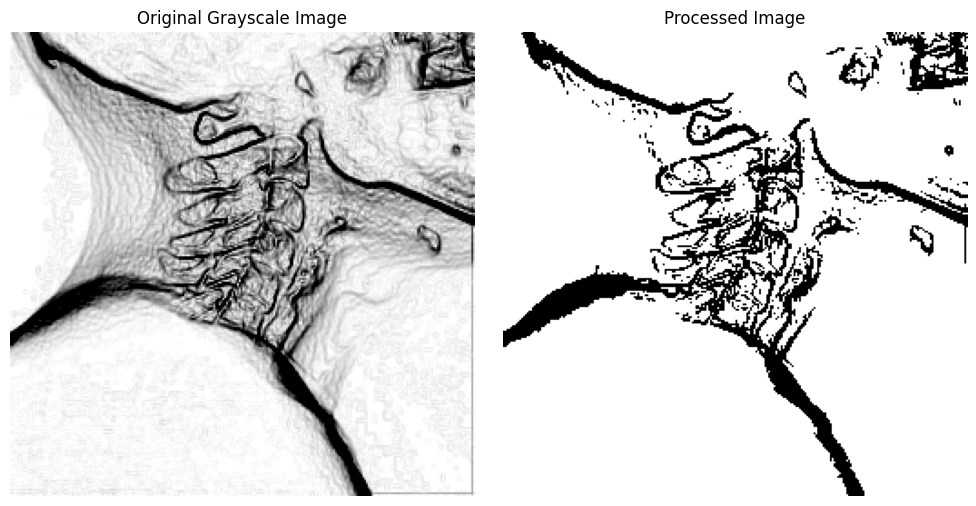

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image in grayscale
image = cv2.imread('NGP_PRE2.png', cv2.IMREAD_GRAYSCALE)

# Define a threshold value
threshold = 84

# Placeholder functions for processing
def process1(x, y, value):
    print(f"Process1 at ({x},{y}) with value {value}")

def process2(x, y, value):
    print(f"Process2 at ({x},{y}) with value {value}")
# Plot original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Iterate through each pixel
height, width = image.shape
for y in range(height):
    for x in range(width):
        pixel_value = image[y, x]
        if pixel_value < threshold:
            image[y, x] = 0
        else:
            image[y, x] = 1


plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite("pre2.png", image)

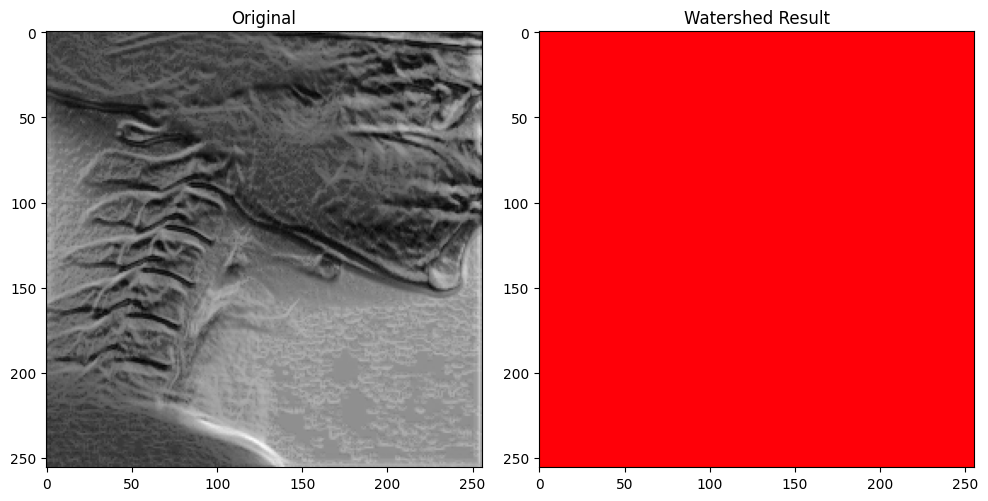

In [32]:
import cv2
import numpy as np
from scipy import ndimage

image = cv2.imread('N1-1.png')
# Step 2: Convert to grayscale and threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Step 3: Noise removal and sure background
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 4: Sure foreground using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Step 5: Unknown region (background - foreground)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 6: Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Increment labels to ensure background is not 0
markers = markers + 1

# Mark unknown regions with 0
markers[unknown == 255] = 0

# Step 7: Apply watershed
image_color = image.copy()
markers = cv2.watershed(image_color, markers)

# Step 8: Visualize with colored regions
label_hue = np.uint8(179 * markers / np.max(markers))
blank_ch = 255 * np.ones_like(label_hue)
colored_markers = cv2.merge([label_hue, blank_ch, blank_ch])
colored_markers = cv2.cvtColor(colored_markers, cv2.COLOR_HSV2BGR)
colored_markers[markers == -1] = [0, 0, 255]  # Red boundary

# Show or save
cv2.imwrite("result_watershed.png", colored_markers)

# Optional: Show using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Watershed Result')
plt.imshow(cv2.cvtColor(colored_markers, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

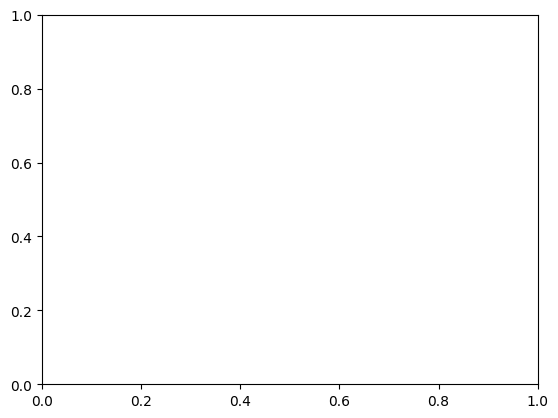

In [2]:
import cv2
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
image = cv2.imread('NGP_PRE2.png')
# Step 2: Convert to grayscale and threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize saliency detector
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# Compute saliency map
(success, saliencyMap) = saliency.computeSaliency(image)

# Convert to displayable image
saliencyMap = (saliencyMap * 255).astype("uint8")

# Display
plt.imshow("Original", image)
plt.imshow("Saliency Map", saliencyMap)

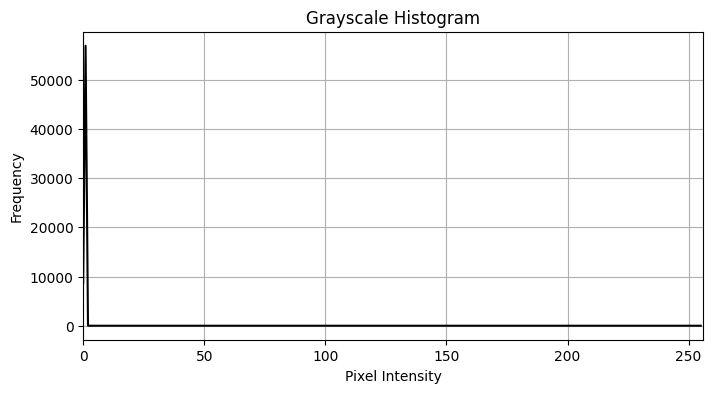

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread('pre2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(8, 4))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()
